# Suicides In India (2001- 2012)



Import Liabraries or Packages

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data=pd.read_csv('Suicides in India 2001-2012.csv')

In [36]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [37]:
data.shape

(237519, 7)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [39]:
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

# Total Suicides in India

In [40]:
data.Total.sum()

13071734

In [41]:
data.sort_values(['Total'], ascending = False).head()

,State,Year,Type_code,Type,Gender,Age_group,Total
209783,Total (All India),2012,Social_Status,Married,Male,0-100+,63343
209757,Total (All India),2011,Social_Status,Married,Male,0-100+,62433
210099,Total (States),2012,Social_Status,Married,Male,0-100+,62123
209733,Total (All India),2010,Social_Status,Married,Male,0-100+,61453
210069,Total (States),2011,Social_Status,Married,Male,0-100+,61242


# Total Suicides In India State Wise

In [42]:
D=data.groupby('State').Total.sum().sort_values(ascending = True)
D

State
Lakshadweep               50
Daman & Diu             1391
Nagaland                1728
Manipur                 2102
D & N Haveli            3430
Mizoram                 4154
Chandigarh              5164
Meghalaya               5415
Arunachal Pradesh       6633
A & N Islands           8109
Sikkim                  9606
Jammu & Kashmir        14821
Goa                    17363
Uttarakhand            18496
Himachal Pradesh       26562
Puducherry             32144
Tripura                45965
Bihar                  46214
Punjab                 46350
Jharkhand              49720
Total (Uts)            53836
Delhi (Ut)             84272
Haryana               147176
Assam                 172276
Uttar Pradesh         233352
Rajasthan             255134
Odisha                267234
Chhattisgarh          302354
Gujarat               330858
Madhya Pradesh        451535
Kerala                538946
Karnataka             734825
Andhra Pradesh        814059
Tamil Nadu            818691
West Ben

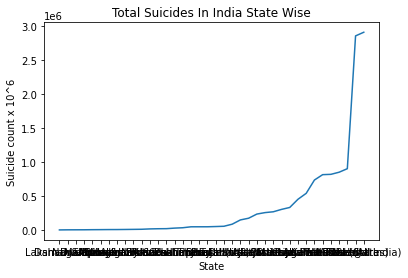

In [43]:
x= D.index.values
y= D.values
plt.plot(x,y)

plt.title('Total Suicides In India State Wise')
plt.xlabel('State')
plt.ylabel('Suicide count x 10^6')
plt.show()

#Total suicide In India Yearwise 

In [44]:
A= data.groupby('Year').Total.sum()
A

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [45]:
x= A.index.values
y= A.values


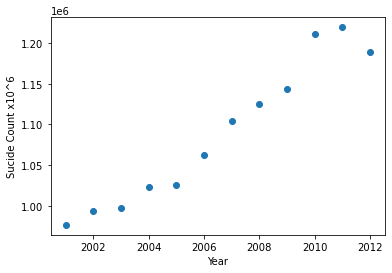

In [46]:
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Sucide Count x10^6')
plt.show()


# Total Suicides in india Gender Wise

In [47]:
data.groupby('Gender').Total.sum()

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

# Total Suicides in India State-Year-Gender Wise

In [48]:
 data.groupby(['State','Year','Gender']).Total.sum()

State          Year  Gender
A & N Islands  2001  Female      250
                     Male        395
               2002  Female      265
                     Male        455
               2003  Female      215
                               ...  
West Bengal    2010  Male      46505
               2011  Female    34340
                     Male      48120
               2012  Female    18831
                     Male      26040
Name: Total, Length: 912, dtype: int64

# Total Suicides In INDIA by type(Cause)

In [49]:
data.groupby(['Type']).Total.sum().sort_values(ascending=False)

Type
Married                                           3065322
Primary                                           1088481
Middle                                            1028913
No Education                                       965271
Never Married                                      954903
                                                   ...   
Bankruptcy or Sudden change in Economic Status       2655
Illegitimate Pregnancy                               2494
Ideological Causes/Hero Worshipping                  2118
By Machine                                           1661
Not having Children (Barrenness/Impotency             766
Name: Total, Length: 69, dtype: int64

# Data Model Building - Linear Regression

In [50]:
D=data.groupby('Year').Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

Expected 2D array, got 1D array instead:
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [51]:
# For removing this type  of error we reshape the data
x=D.index.values.reshape(-1,1)
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [52]:
y=D.values
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

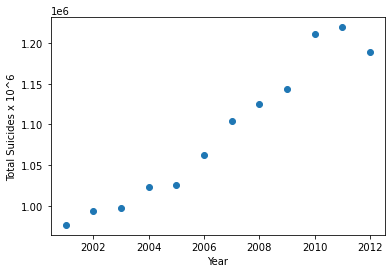

In [53]:
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Total Suicides x 10^6')
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg.fit(x,y)

LinearRegression()

In [55]:
# Y=mx +C  m=Regression Coefficient, C= Intercept by sckit learn 

In [56]:
Reg.coef_

array([23818.18881119])

In [57]:
Reg.intercept_

-46701884.682983674

In [58]:
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

In [59]:
Yp=Reg.predict(x)
Yp

array([ 958311.12820512,  982129.31701631, 1005947.5058275 ,
       1029765.69463869, 1053583.88344987, 1077402.07226107,
       1101220.26107226, 1125038.44988345, 1148856.63869463,
       1172674.82750582, 1196493.01631701, 1220311.2051282 ])

In [60]:
from sklearn.metrics import r2_score
r2_score(y,Yp)

0.9461522633937145

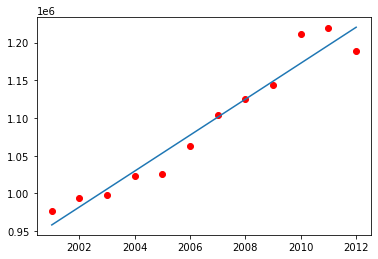

In [61]:
plt.scatter(x,y,color='red')
plt.plot(x,Yp)
plt.show()

In [62]:
Reg.score(x,y)*100

94.61522633937145

# For checking or predicting Suicides in futures In INDIA through this method

In [68]:
Z=Reg.predict(x)

In [69]:
Z=Reg.predict([[2065]])
Z

array([2482675.2121212])

# In India we will predicting through this algorithm that in 2065th year the suicide count will be 24,82,675 nos.

# Save the Model

In [70]:
import pickle as pkl
file = open('SIP.pkl','wb')
